In [50]:
# Set up environment

import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

df = pd.read_csv('./WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Introduction.

Many companies are facing the problem of recruiting and retaining talents while at the same time having to deal with talent loss through attrition. Losing talents and employees result in performance losses and can have a long-term negative effect on the companies. Besides, attrition might leave gaps in its execution and human resource team, and causes loss of work team harmony and social goodwill. There are many factors that might result in attribution, issues of salary, lack of career mobility and challenges, working environment, just to name a few. 

In this research, we will look into the data of IBM HR Analytics Employee Attrition & Performance. By studying employee profiles, we would like to answer what factors are more likely to cause attrition, and what potential methods can be applied to reduce attrition rate.


# Question #1: “Are male employees at the company more likely to quit the job?”

We would like to answer the question: “Are male employees at the company more likely to quit the job?” To answer this question, we would study the attrition rate index, and compare it between male employees and female employees at the company. A higher attrition rate would indicate a higher probability to quit.

### Hypothesis

We would like to answer the question: “Are male employees at the company more likely to quit the job?” To answer this question, we would study the attrition rate index, and compare it between male employees and female employees at the company. A higher attrition rate would indicate a higher probability to quit.

To answer the question, I designed the following hypothesis:

- Ho: male employees and female employees at the company have the same attrition rate.
    
- Ha: male employees and female employees at the company do NOT have the same attrition rate.


### Data

The data comes from Kaggle, titled “IBM HR Analytics Employee Attrition & Performance”, which can be found at the following link: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset. 

The dataset consists of 35 columns(variables) and 1471 rows(records). The sample size is large enough. The variables are likely to provide information for a meaningful study. Based on what we are mostly interested in, we might work on variables including “Attrition”, “YearsAtCompany”, “Gender”, “Department”, etc. There are no missing values in the dataset.


In [51]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [52]:
# Count records by gender
print(df['Attrition'].groupby(df['Gender']).agg(['count']))
print()
# convert "Yes" and "No" in Attrition to "1" and "0" in Attribution_num
df['Attrition_num'] = df['Attrition'].map(dict(Yes=1, No=0))
df.head(10)

# Compare attrition rate by gender
# print(df[['Attrition_num']].groupby(df['Gender']).mean())
print("Attrition rate of")
print("male employees is: \t{:.4f}".format(df[df.Gender == 'Male']['Attrition_num'].mean()))
print("female employees is: \t{:.4f}".format(df[df.Gender == 'Female']['Attrition_num'].mean()))
print("The difference of the mean from the two samples is: \t{:.4f}".format(df[df.Gender == 'Male']['Attrition_num'].mean()
                                                                           -df[df.Gender == 'Female']['Attrition_num'].mean()))
print()

print('''
the attrition rate of male employees and female employees are both over 10%, 
male employee has higer attrition rate.
''')


        count
Gender       
Female    588
Male      882

Attrition rate of
male employees is: 	0.1701
female employees is: 	0.1480
The difference of the mean from the two samples is: 	0.0221


the attrition rate of male employees and female employees are both over 10%, 
male employee has higer attrition rate.



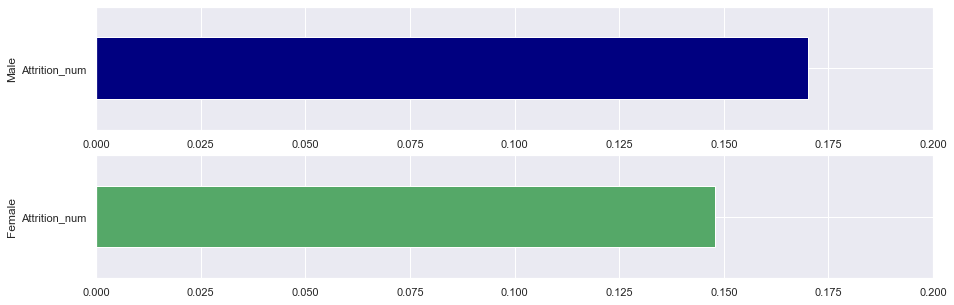

In [53]:
fig, ax = plt.subplots(2, 1, figsize=(15, 5))
df[df.Gender=="Male"][['Gender','Attrition_num']].mean().plot(kind='barh', ax=ax[0],color='navy')
df[df.Gender=="Female"][['Gender','Attrition_num']].mean().plot(kind='barh', ax=ax[1],color='g')
for _ in ax:
    _.set_xlim([0,0.2])
ax[0].set_ylabel('Male')
ax[1].set_ylabel('Female')
plt.show()

### Methods

For this analysis I will create two DataFrames, one containing all records of male employees and another for all female employees. 

Since we care about the attrition rate, which is a sample proportion, we will conduct an independent samples t-test between the groups at the two-tail, 95% confidence interval. 

(if we already have the pre-knowledge that the attrition rate in group is higher than another, i.e. we assume male employees have higher attrition rate, then we might consider to conduct one-tailed t-test. In this case, we don't assume such pre-knowledge, so we might as well just perform the default two-tailed t-test)

In [54]:
print(stats.ttest_ind(df[df.Gender == 'Male']['Attrition_num'], df[df.Gender == 'Female']['Attrition_num']))
print('''
Since the p-value is higher than the 5% threshold, 
we cannot reject the null hypothesis
so, the attrition rate between male and female employees are not significantly different
''')

Ttest_indResult(statistic=1.1289761152328313, pvalue=0.25909236414147996)

Since the p-value is higher than the 5% threshold, 
we cannot reject the null hypothesis
so, the attrition rate between male and female employees are not significantly different



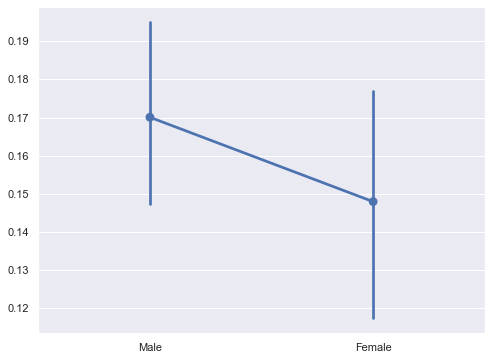

In [55]:
# Pointplot to show sample mean and confidence interval
sns.set(rc={'figure.figsize':(8,6)})

g = sns.pointplot(data=[df[df.Gender == 'Male']['Attrition_num'],
                        df[df.Gender == 'Female']['Attrition_num']], join=True)
                        
# Adding a semicolon means output won't render in 
g.set(xticklabels = ['Male', 'Female']);

In [56]:
# get 95% confidence interval
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
#     return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")
    return mean_difference, std_err_difference

mean_difference, std_err_difference = get_95_ci(df[df.Gender == 'Female']['Attrition_num'], df[df.Gender == 'Male']['Attrition_num'])

### Results

Based on the feature of attrition variables, I proceeded with the t-test. Based on a p-value of 0.25, I conclud that we CANNOT reject the null that there is no significant difference in means. In other words, there is no significant difference of the attrition rate between male and female employees.

After calculate The 95% confidence interval, the mean difference of attrituion rate between the two groups is in the range (-0.0158, 0.0600)

# Question #2: Do male employees stay less years at the company?

A related question, but not the same and would require a different research, would be “Do male employees stay less years at the company?” To answer this question, we would look into “year at the company” index. A smaller value of “year at the company” would indicate an employee would stay less year at the company.

### Hypothesis for Question #2

To answer the question, I designed the following hypothesis:

- Ho: the mean “year at the company” value of male employees and female employees at the company are the same.
    
- Ha: the mean “year at the company” value of male employees and female employees at the company are NOT the same.


### Data for Question #2

same data as question #1.

But this time, we will focus on 'Gender', “YearsAtCompany” columns



In [57]:
# Count records by gender
print(df['YearsAtCompany'].groupby(df['Gender']).agg(['count']))
print()

        count
Gender       
Female    588
Male      882



### Methods 

For this analysis I still used the two DataFrames, one containing all records of male employees and another for all female employees. 

Since the 'YearsAtCompany' is numerical, we need to first check normality of the variable of interest in the sample dataset, then based on whether they follow normal distribution choose T-test or Kruskal-test.

Male:  DescribeResult(nobs=882, minmax=(0, 37), mean=6.859410430839002, variance=38.50915651921002, skewness=1.9149521259854552, kurtosis=4.588815761171853)
Female: DescribeResult(nobs=588, minmax=(0, 40), mean=7.2312925170068025, variance=36.05203444239705, skewness=1.5224652107714258, kurtosis=2.856456864152511)


Since the distributions of sample are non-formal,
we will conduct Kruskal-test.



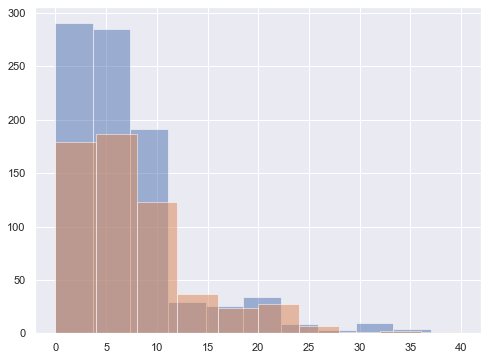

In [58]:
# establish formality
# visually
plt.hist(df[df.Gender == 'Male']['YearsAtCompany'], alpha=0.5)
plt.hist(df[df.Gender == 'Female']['YearsAtCompany'], alpha=0.5)

# discriptive
print("Male: ",  stats.describe(df[df.Gender == 'Male']['YearsAtCompany']))
print("Female:",  stats.describe(df[df.Gender == 'Female']['YearsAtCompany']))
print()

print('''
Since the distributions of sample are non-formal,
we will conduct Kruskal-test.
''')


In [59]:
stats.kruskal(df[df.Gender == 'Male']['YearsAtCompany'], df[df.Gender == 'Female']['YearsAtCompany'])

KruskalResult(statistic=2.613132951059804, pvalue=0.10598219738050443)

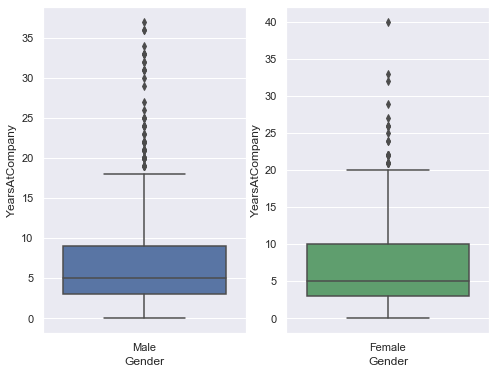

In [60]:
# boxplot
# Since the distribution is non-normal, it is better to visualize using 
# boxplot or voilinplot

f, axes = plt.subplots(1, 2)
sns.boxplot(y='YearsAtCompany', x='Gender', data=df[df.Gender == 'Male'][['Gender','YearsAtCompany']], color='b',ax=axes[0])
sns.boxplot(y='YearsAtCompany', x='Gender', data=df[df.Gender == 'Female'][['Gender','YearsAtCompany']], color='g',ax=axes[1])
plt.show()

### Results

Since the two sample sets are non-formal, I proceeded with the Kruskal-test, which works well for A/B test with non-formal distribution samples. Based on a p-value of 0.11, I conclud that we CANNOT reject the null that there is no significant difference in means of variable of interest. In other words, there is no significant difference of the mean "year work at the company" between male and female employees.

Since the distribution is non-formal and very skewed, which means the sample mean is not a good indicator for central tendency. So, I skipped that part of calculating 95% confidence interval.

# Question #3: Do employees of different dducation level have very different attrition rate? If so, which one stands out?

This time we will look into the "Education" factor and its effect on attrition. Our question is: "Do employees of Different Education Level Have Very Different Attrition Rate?" In addition, if we find out that there are significant differet attrition rates among employees with different education level. We would like to point out which group(s) has(have) higher attrition rate. (This question we will mainly focus on visulization analysis.)

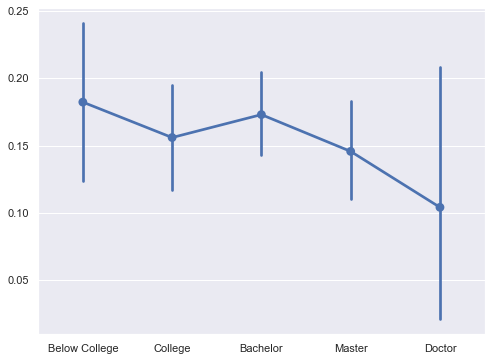

In [61]:
# Data Preparation and Visualization 
# using pointplot
sns.set(rc={'figure.figsize':(8,6)})

g = sns.pointplot(data=[df[df.Education == 1]['Attrition_num'],
                        df[df.Education == 2]['Attrition_num'],
                      df[df.Education == 3]['Attrition_num'],
                      df[df.Education == 4]['Attrition_num'],
                      df[df.Education == 5]['Attrition_num']], join=True)
                        
# 1. Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor
g.set(xticklabels = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']);


### Results

There is a trend that, the higher level education employess have, the lower attrition rate. But based on the sampling data, from the point plot, there is no education group has statistically significantly different attrition rate. (There are large overlappings of the 95% confidence interavls) 

# Question #4: Do employees of different education level will tell us the year they would stay at the company?

We are still focusing on the "education" factor. This time we ask:"Do employees of Different Education Level Will Tell Us The Year Stay at The Company?" In other words, do people with higher education would stay longer at the company, or on the contrary, or such association at all? (This question we will mainly focus on visulization analysis.)

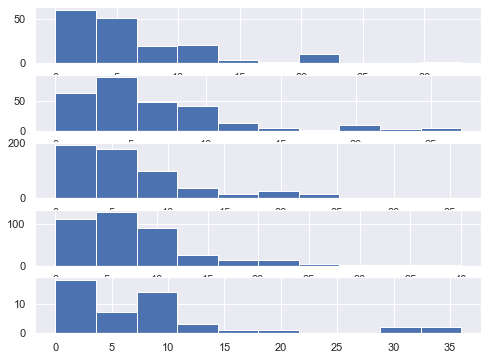

In [62]:
# establish formality
# visually (look skewed)
f, axes = plt.subplots(5, 1)
for index in range(len(axes)):
    axes[index].hist(df[df.Education == index+1]['YearsAtCompany'])
plt.show()    




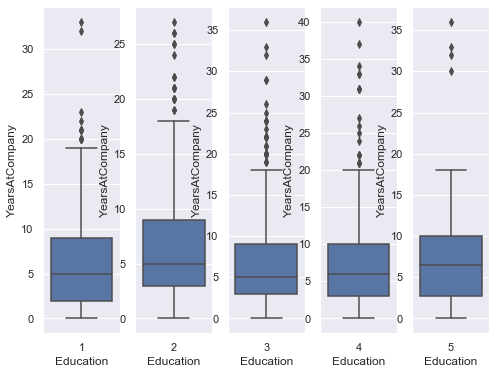

In [63]:
# boxplot
# Since the distribution is non-normal, it is better to visualize using 
# boxplot or voilinplot

f, axes = plt.subplots(1, 5)
for index in range(len(axes)):
    sns.boxplot(y='YearsAtCompany', x='Education', data=df[df.Education == index+1][['Education','YearsAtCompany']], color='b',ax=axes[index])

### Results

There is a vague trend that, the higher the education, the longer the employees stay at the company. Except that, employees with education level 2 (college) have longest years stay at the company. Based on the data provided, when looking at the box plot, there is no education group has significantly "year stay at the company" value from others.


# Discussion and recommendation 

Based on the result, there is no significant difference in attrition rate between male employees and female employees. The company should not reject a candidate over another merely based on their gender when concerning that one has higher probability to quit the job. Even though male employers have higher attrition rate, but such difference between different genders can be merely casued by randomness. 

Based on the result, there is no significant difference in the mean "year work at the company" between male and female employees. Gender should not be the reason for hiring or promotion if one assumes that male employees are more likely to quit, or vice versa, because such assumption is not necessarily true.  

There is a trend that, the higher level education employess have, the lower attrition rate. Also there is a vague trend that, the higer education the employees have, the longer the employees stay at the company. But based on the sampling data, from the point plot, there is no education group has statistically significantly different attrition rate. Neither such significantly difference exist for the year stay at the company among different education groups. Similar to what has mentioned before, there are should be no discrimination on people with different educational level by assuming employees from one group are significantly more likely to quit.

We might want to keep on study other factor(s) that significantly contributes to attrition. And come up with methods accordingly to reduce attrition rate.


# What are concers and potential improvement for this analysis?

When conducting A/B test, we assume that the samples have everything else the same except the control variables. In our test, it means the male employees and female employees are the same except the gender. But this might not be necessarily true and can bring bias to the experiment. Consider the scenario that, the male employee group has more young people, who are actually more likely to quit. While the female group has more employees feeling more stressed, who are more likely the group. These two factors might “average out” the effect between male and female sample groups, and that’s why there is no significant difference between the two sample groups. To test whether such influences exist, we can conduct A/B test to exam whether the two sample groups are significant in age, stress level, and other variables of interest.

The “percentage salary hike” variable is just one value. Salary hike opportunity can be an important factor to decrease attrition rate. For instance, if the employee got salary hike for more once, it would be helpful to provide information including when and how much the employee got salary hike each time.